# 21900793 Taegeon Han
## AIAP Assignment1

# 2 Part 1
## 2.1 Skim through the Dataset
### 2.1.1 Table Visualization
### Print the Wine dataset’s metadata and its variable information

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

 #//wine_dataset= pd.read_csv("wine/wine.data", header=None)
print(wine_dataset)
print(wine_dataset.metadata)
print(wine_dataset.variables)

# Set column names
column_names = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", 
                "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", 
                "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
wine_dataset.columns = column_names

### Print the first five rows of the dataset


In [2]:
print(wine_dataset.head(5))

   0      1     2     3     4    5     6     7     8     9     10    11    12  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1   1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2   1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3   1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4   1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
4   735  


###  Print a table in which the columns are the variables and the rows are:
1. count
2. mean
3. standard deviation
4. minimum value
5. 25% percentile
6. median
7. 75% percentile
8. maximum value


In [9]:
wine_dataset.describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### 2.1.2 Histogram Visualization
• Plot a histogram for each variables of the Wine dataset

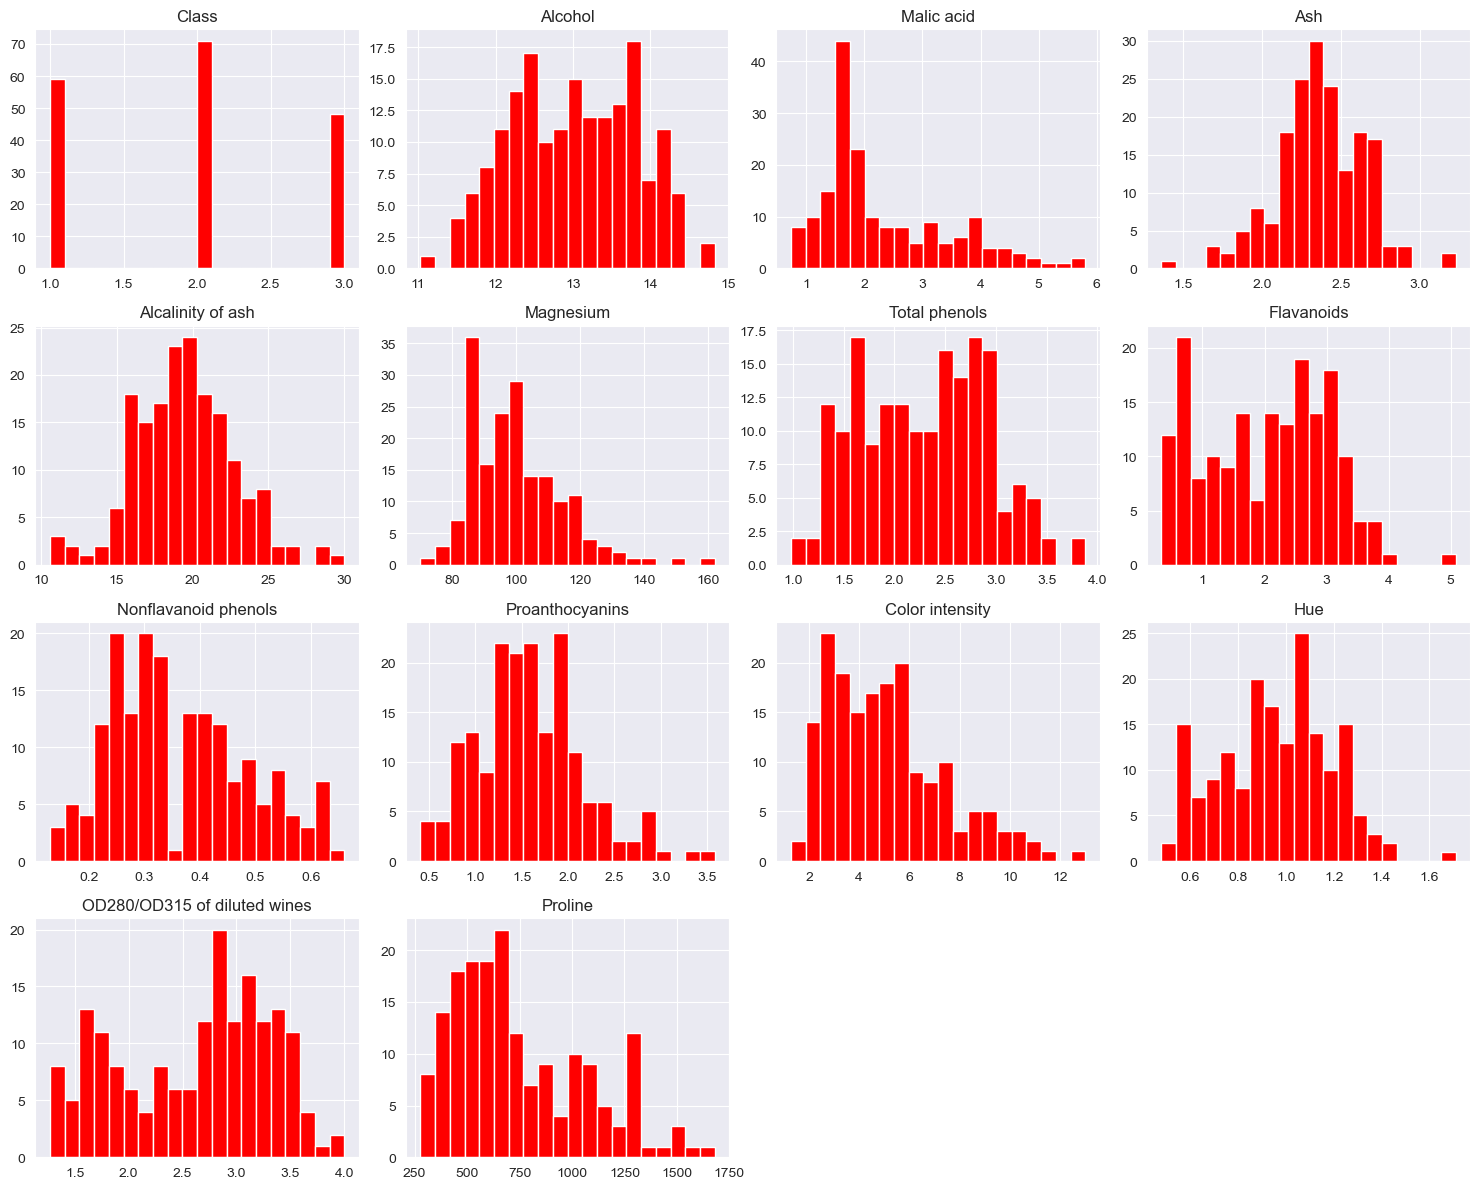

In [4]:
# Number of rows and columns for subplots
rows = 4
cols = 4

plt.figure(figsize=(15, 12))

# Loop through all the columns and plot histograms
for i, column in enumerate(wine_dataset.columns):
    plt.subplot(rows, cols, i+1)
    xX
    plt.title(column)
    plt.grid(True)

# Adjust layout to make room for titles and prevent overlap
plt.tight_layout()
plt.show()

## 2.2 Train-Test Split
### 2.2.1 User-defined Function
• Define a train-test split function named ’Split_train_test’ from page 85 of our textbook.
• Divide the Wine dataset into train and test sets. Set the test ratio as 0.2
• Print the length of the train set and the test set.
• Describe two limitations of this function.

In [53]:
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data)) # mix data randomly
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size] # indicate mixed index data that from begin to test_set_size  
 train_indices = shuffled_indices[test_set_size:]
 return wine_dataset.iloc[train_indices], wine_dataset.iloc[test_indices] # Indicate the location of rows and use pandas lib

train_set, test_set = split_train_test(wine_dataset, test_ratio=0.2)

print("Length of train set: ", len(train_set))
print("Length of test set: ", len(test_set))

print("\nLimitation of the split_train_test function")
print("1. Non-reproducibility: The train-test split function does not guarantee reproducibility by default.")
print("2. Stratified splitting: The function does not perform stratified sampling, which may lead to biased splits if the dataset is imbalanced.")

Length of train set:  142
Length of test set:  35

Limitation of the split_train_test function
1. Non-reproducibility: The train-test split function does not guarantee reproducibility by default.
2. Stratified splitting: The function does not perform stratified sampling, which may lead to biased splits if the dataset is imbalanced.


### 2.2.2 Scikit Learn’s Function
• Using Scikit Learn’s train_test_split function, divide the Wine dataset into train and test sets. Set
the test ratio as 0.2
• Print the length of the train set and the test set

In [5]:
train_set, test_set = train_test_split(wine_dataset, test_size=0.2)
noClass = wine_dataset.drop(columns=['Class'])
print("Length of train set:", len(train_set))
print("Length of test set:", len(test_set))

Length of train set: 142
Length of test set: 36


## 2.3 Correlation
### 2.3.1 Correlation Visualization
• Visualize the correlation between each variables of the Wine dataset using scatter plot.

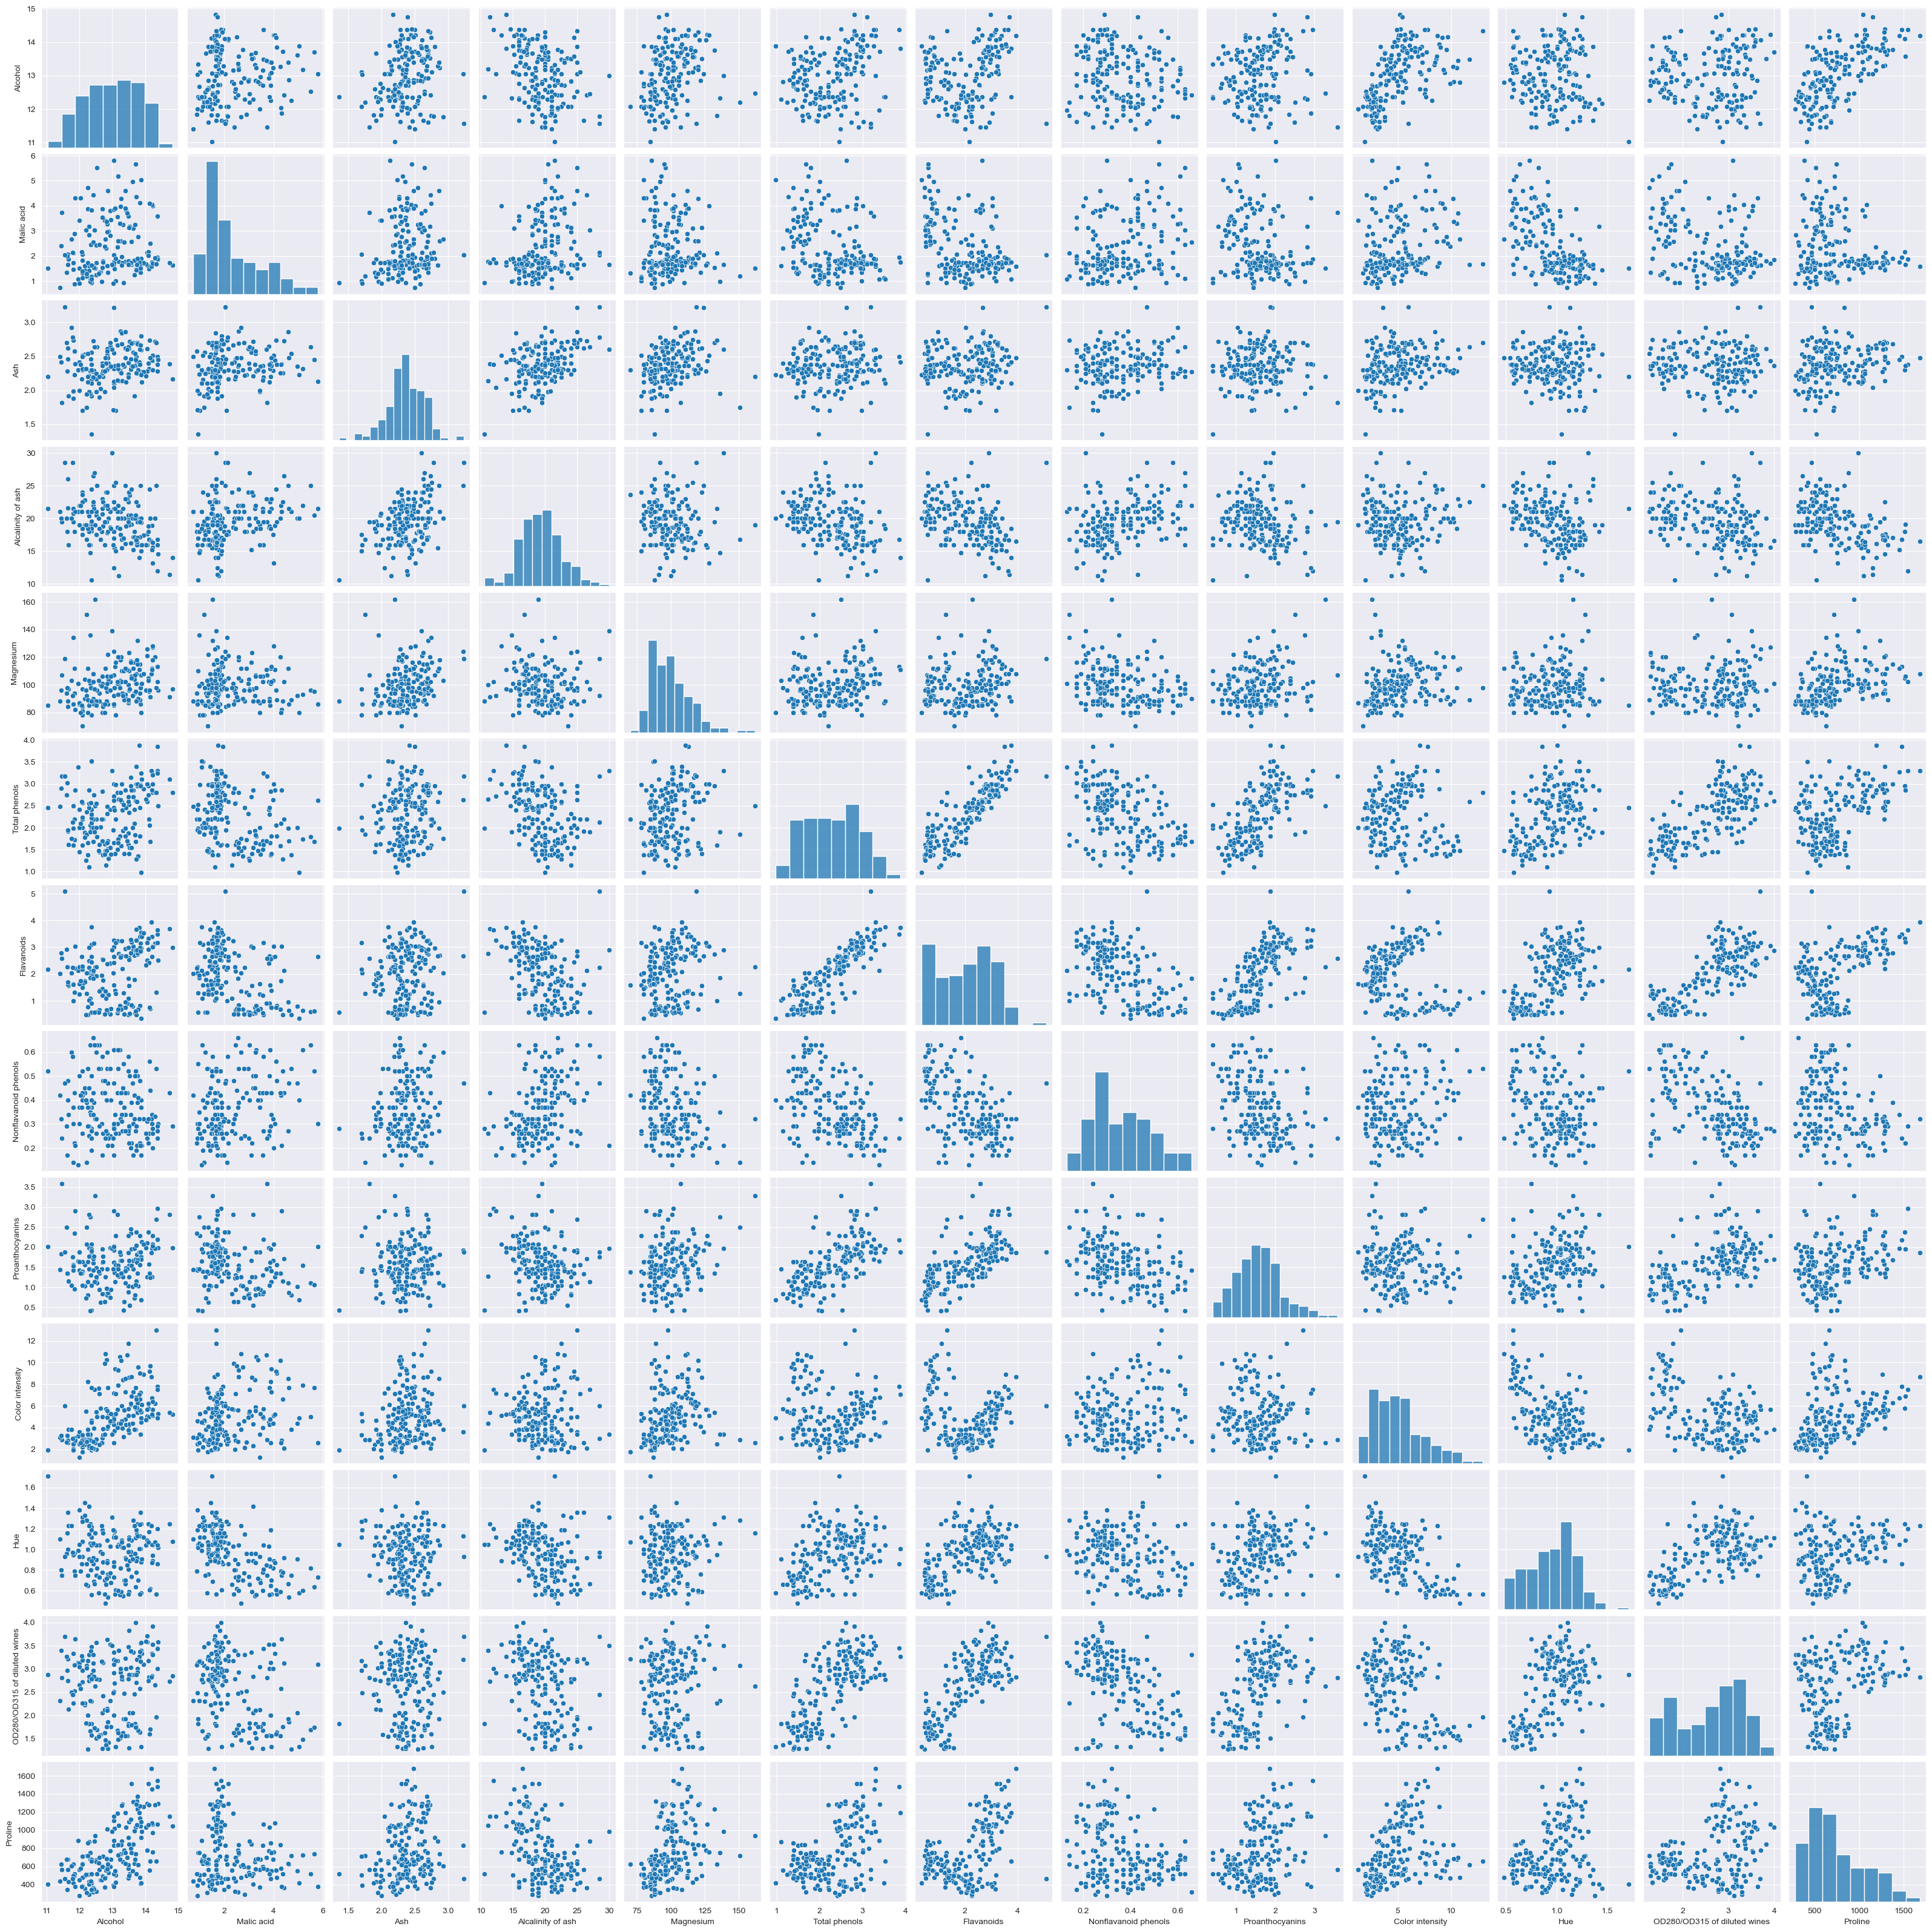

In [6]:
sns.pairplot(noClass)  # scatter plot, 데이터 셋 내의 변수들 간의 관계를 시각적으로 파악하기 유용. Use Seaborn lib
plt.show()

### 2.3.2 Correlation Calculation
• Calculate the correlation of ’Flavanoids’ with other variables and sort them in descending order.
• Name the variable with the highest correlation with ’Flavanoids’ apart from itself.

In [13]:
# Calculate the correlation of 'Flavanoids' with other variables
correlation_with_flavanoids = wine_dataset.corr()['Flavanoids'].sort_values(ascending=False)

# Remove correlation with itself
correlation_with_flavanoids = correlation_with_flavanoids.drop('Flavanoids') # 자기 자신과의 상관관계는 관심 대상 아님

# Print correlation values
print("Correlation of 'Flavanoids' with other variables:")
print(correlation_with_flavanoids)

# Get the variable with the highest correlation apart from itself
highest_correlation_variable = correlation_with_flavanoids.idxmax()
highest_correlation_value = correlation_with_flavanoids.max()

print("\nVariable with the highest correlation with 'Flavanoids' (apart from itself):", highest_correlation_variable)
print("Correlation value:", highest_correlation_value)

Correlation of 'Flavanoids' with other variables:
Total phenols                   0.864564
OD280/OD315 of diluted wines    0.787194
Proanthocyanins                 0.652692
Hue                             0.543479
Proline                         0.494193
Alcohol                         0.236815
Magnesium                       0.195784
Ash                             0.115077
Color intensity                -0.172379
Alcalinity of ash              -0.351370
Malic acid                     -0.411007
Nonflavanoid phenols           -0.537900
Class                          -0.847498
Name: Flavanoids, dtype: float64

Variable with the highest correlation with 'Flavanoids' (apart from itself): Total phenols
Correlation value: 0.8645635000951147


## 2.4 Missing Values
### 2.4.1 Check for missing Values
• Print the number of missing values in each variable in the Wine dataset.

In [74]:
missing_values_count = wine_dataset.isnull().sum()  # 각 열에 대한 결측값 나타냄

# Print the number of missing values in each variable
print("Number of missing values in each variable:")
print(missing_values_count)

Number of missing values in each variable:
Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


### 2.4.2 Data Imputation
• Create missing values in the Wine dataset (Note: Missing rate is 0.1).
• Print the number of missing values in each variable.
• Impute the mean value of each variable into the missing values.

In [54]:
# Create missing values in the dataset
missing_rate = 0.1
missing_mask = np.random.rand(*wine_dataset.shape) < missing_rate
wine_dataset_missing = wine_dataset.mask(missing_mask) # mask는 missing_mask가 True인 위치에 해당하는 값을 결측값으로 대체 --> wine_dataset에서 결측값 생성

# Print the number of missing values in each variable
print("Number of missing values in each variable before imputation:")
print(wine_dataset_missing.isnull().sum())

# Impute the mean value of each variable into the missing values
wine_dataset_imputed = wine_dataset_missing.fillna(wine_dataset.mean()) # 평균값으로 결측값 채움

# Print the number of missing values in each variable after imputation
print("\nNumber of missing values in each variable after imputation:")
print(wine_dataset_imputed.isnull().sum())

Number of missing values in each variable before imputation:
Class                           18
Alcohol                         19
Malic acid                      17
Ash                             23
Alcalinity of ash               17
Magnesium                       16
Total phenols                   19
Flavanoids                      20
Nonflavanoid phenols            18
Proanthocyanins                 22
Color intensity                 28
Hue                             16
OD280/OD315 of diluted wines    22
Proline                         21
dtype: int64

Number of missing values in each variable after imputation:
Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
H

# 3 Part 2
## 3.1 Encoding
### 3.1.1 Ordinal Encoding
• For all categorical variables from the diamonds dataset, encode the data and replace it to the variables
in the original dataframe.

In [15]:
diamonds = pd.read_csv("diamonds.csv")

# Identify categorical variables
categorical_vars = diamonds.select_dtypes(include=['object']).columns   # diamonds에서 object 열만 선택

# Perform one-hot encoding(범주형->수치화) for categorical variables
encoded_categorical_vars = pd.get_dummies(diamonds[categorical_vars]) # 범주형 변수들을 원-핫 인코딩하여 새로운 데이터프레임을 생성

# Replace original categorical variables with encoded ones
diamonds_encoded = pd.concat([diamonds.drop(columns=categorical_vars), encoded_categorical_vars], axis=1)   # .drop으로 범주형 변수 제거 -> 인코딩된 변수만 남음. concat으로 diamonds와 원-핫 인코딩 결과를 열 방향으로 합침

# Print the first few rows of the encoded dataframe
print(diamonds_encoded)

       carat  depth  table   price   'x'   'y'   'z'  cut_b'Fair'  \
0       0.23   61.5   55.0   326.0  3.95  3.98  2.43        False   
1       0.21   59.8   61.0   326.0  3.89  3.84  2.31        False   
2       0.23   56.9   65.0   327.0  4.05  4.07  2.31        False   
3       0.29   62.4   58.0   334.0  4.20  4.23  2.63        False   
4       0.31   63.3   58.0   335.0  4.34  4.35  2.75        False   
...      ...    ...    ...     ...   ...   ...   ...          ...   
53935   0.72   60.8   57.0  2757.0  5.75  5.76  3.50        False   
53936   0.72   63.1   55.0  2757.0  5.69  5.75  3.61        False   
53937   0.70   62.8   60.0  2757.0  5.66  5.68  3.56        False   
53938   0.86   61.0   58.0  2757.0  6.15  6.12  3.74        False   
53939   0.75   62.2   55.0  2757.0  5.83  5.87  3.64        False   

       cut_b'Good'  cut_b'Ideal'  ...  color_b'I'  color_b'J'  clarity_b'I1'  \
0            False          True  ...       False       False          False   
1          

### 3.1.2 One-Hot Encoding
• For all categorical variables from the diamonds dataset, encode the data, convert it into numpy array
format and print the first five sample’s encoded cut variable.

In [102]:
# Perform one-hot encoding for the 'cut' variable
encoded_cut = pd.get_dummies(diamonds['cut'])

# Convert the encoded cut variable into a numpy array
cut_encoded_array = encoded_cut.values  # one-hot 결과를 numpy array로 변환 및 추출

# Print the encoded cut variable for the first five samples
print("Encoded cut variable for the first five samples:")
print(cut_encoded_array[:5])

Encoded cut variable for the first five samples:
[[0 0 1 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]]


## 3.2 Scaling
### 3.2.1 MinMaxScaling
• For all continuous variables in the diamonds dataset, min-max scale the data and replace it to the
variables in the original dataframe.
• Print the first five rows of the new dataframe.

In [17]:
# Identify continuous variables
continuous_vars = diamonds.select_dtypes(include=['int64', 'float64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler() # 스케일러이며 값을 0-1 사이로 변환

# Min-max scale the continuous variables
diamonds_scaled = diamonds.copy()  # Create a copy of the original dataframe
diamonds_scaled[continuous_vars] = scaler.fit_transform(diamonds[continuous_vars])  # 데이터 스케일링하면서 객체 학습(fit)하고 데이터 변환(transform)함

# Print the first five rows of the new dataframe
print(diamonds_scaled.head())

      carat         cut color clarity     depth     table     price       'x'  \
0  0.006237    b'Ideal'  b'E'  b'SI2'  0.513889  0.230769  0.000000  0.367784   
1  0.002079  b'Premium'  b'E'  b'SI1'  0.466667  0.346154  0.000000  0.362197   
2  0.006237     b'Good'  b'E'  b'VS1'  0.386111  0.423077  0.000054  0.377095   
3  0.018711  b'Premium'  b'I'  b'VS2'  0.538889  0.288462  0.000433  0.391061   
4  0.022869     b'Good'  b'J'  b'SI2'  0.563889  0.288462  0.000487  0.404097   

        'y'       'z'  
0  0.067572  0.076415  
1  0.065195  0.072642  
2  0.069100  0.072642  
3  0.071817  0.082704  
4  0.073854  0.086478  


### 3.2.2 StandardScaling
• For all continuous variables in the diamonds dataset, standard scale (i.e., normalize) the data and
replace it to the variables in the original dataframe.
• Print the first five rows of the new dataframe

In [107]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standard scale (normalize) the continuous variables
diamonds_scaled = diamonds.copy()  # Create a copy of the original dataframe
diamonds_scaled[continuous_vars] = scaler.fit_transform(diamonds[continuous_vars])

# Print the first five rows of the new dataframe
print(diamonds_scaled.head())

      carat         cut color clarity     depth     table     price       'x'  \
0 -1.198168    b'Ideal'  b'E'  b'SI2' -0.174092 -1.099672 -0.904095 -1.587837   
1 -1.240361  b'Premium'  b'E'  b'SI1' -1.360738  1.585529 -0.904095 -1.641325   
2 -1.198168     b'Good'  b'E'  b'VS1' -3.385019  3.375663 -0.903844 -1.498691   
3 -1.071587  b'Premium'  b'I'  b'VS2'  0.454133  0.242928 -0.902090 -1.364971   
4 -1.029394     b'Good'  b'J'  b'SI2'  1.082358  0.242928 -0.901839 -1.240167   

        'y'       'z'  
0 -1.536196 -1.571129  
1 -1.658774 -1.741175  
2 -1.457395 -1.741175  
3 -1.317305 -1.287720  
4 -1.212238 -1.117674  
